IMPORTS

In [164]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns


READ the HOUSING DATA

In [165]:
data = pd.read_csv("Data/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [166]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [167]:
num_columns = ['longitude', 
                       'latitude', 
                       'housing_median_age', 
                       'total_rooms',
                       'total_bedrooms', 
                       'population', 
                       'households', 
                       'median_income']
num_data = data[num_columns]

Data Description

In [168]:
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001


Remove Null Values

In [169]:
num_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [170]:
num_data = num_data.dropna()

In [171]:
num_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

STANDARDIZE THE DATA

In [172]:
scaler = preprocessing.StandardScaler().fit(num_data)
num_data_scaled = scaler.transform(num_data)
num_data_scaled_pd = pd.DataFrame(num_data_scaled,columns = num_data.columns)
num_data_scaled_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143
...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136


In [173]:
num_data_scaled_pd.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-8.457103e-16,1.000024,-2.385447,-1.112692,0.539393,0.778970,2.625711
latitude,20433.0,1.535632e-15,1.000024,-1.447937,-0.797278,-0.642805,0.976821,2.956885
housing_median_age,20433.0,5.007495e-17,1.000024,-2.194584,-0.844466,0.029139,0.664489,1.855769
total_rooms,20433.0,-3.407879e-17,1.000024,-1.205604,-0.542969,-0.233160,0.231783,16.787125
total_bedrooms,20433.0,-7.233049e-17,1.000024,-1.274093,-0.574003,-0.244131,0.258984,14.018707
population,20433.0,-8.067632e-17,1.000024,-1.254828,-0.562970,-0.228513,0.262141,30.230881
households,20433.0,-6.676661e-17,1.000024,-1.303810,-0.573998,-0.236557,0.273527,14.602967
median_income,20433.0,2.948858e-16,1.000024,-1.775054,-0.688411,-0.176208,0.459571,5.859665


In [174]:
num_data_scaled_pd.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000


UNDERSTANDING THE CORRELATIONS

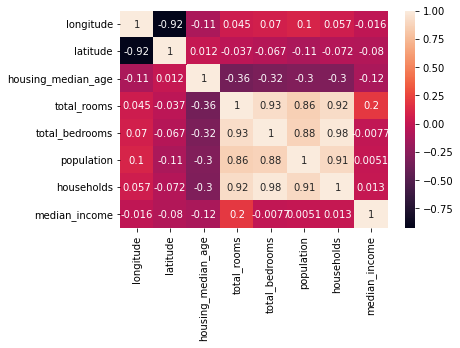

In [175]:
#ploting the heatmap for correlation
ax = sns.heatmap(num_data_scaled_pd.corr(), annot=True)

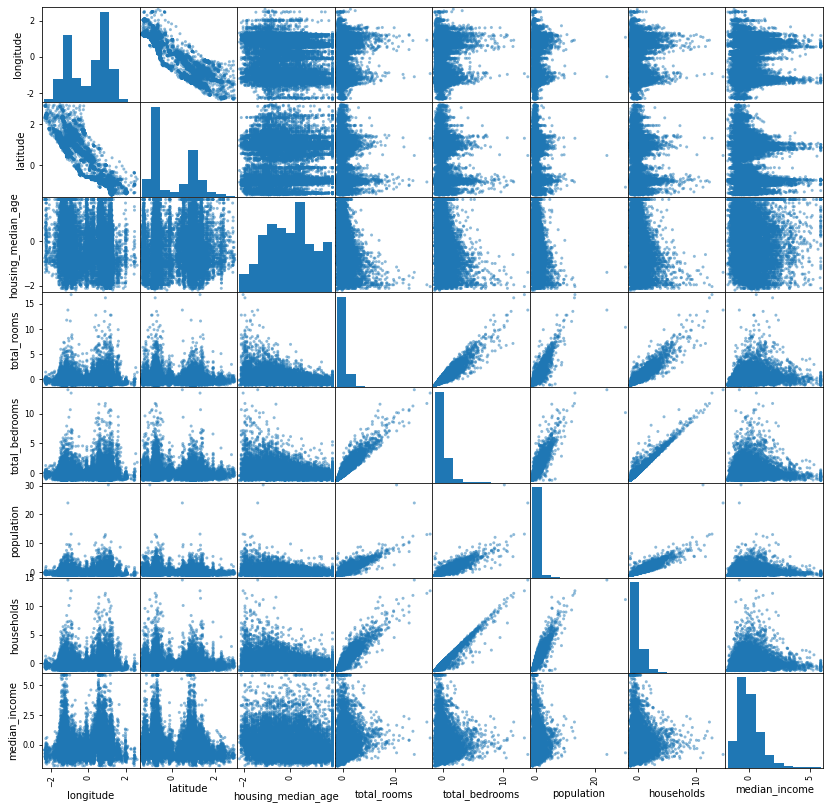

In [176]:
p = pd.plotting.scatter_matrix(num_data_scaled_pd,figsize=(14,14),marker = ".")
plt.show()

APPLY PCA on the data

In [177]:
pca = PCA()
pca.fit(num_data_scaled_pd)
x_pca = pca.transform(num_data_scaled_pd)

1. COMPONENT MATRIX

In [178]:
component_matrix = pd.DataFrame(pca.components_,columns = num_data_scaled_pd.columns).T
component_matrix

,0,1,2,3,4,5,6,7
longitude,0.076554,-0.701173,-0.055862,-0.069062,-0.100463,-0.481196,-0.500392,-0.050703
latitude,-0.073709,0.701885,0.012211,-0.099675,-0.049758,-0.467891,-0.518742,-0.036746
housing_median_age,-0.218303,0.016575,-0.392200,0.887111,-0.035210,-0.091550,-0.040570,0.003973
total_rooms,0.483796,0.075301,0.092746,0.114938,-0.316576,-0.554183,0.554388,-0.154185
total_bedrooms,0.490450,0.061181,-0.116757,0.063249,-0.378217,0.228857,-0.221717,0.702497
population,0.471852,0.026914,-0.116069,0.082861,0.848897,-0.131004,-0.022058,0.134233
households,0.491692,0.063996,-0.109019,0.096630,-0.138478,0.401736,-0.305489,-0.677517
median_income,0.045214,-0.034737,0.891806,0.406098,0.055866,0.055659,-0.168982,0.041729


2. EIGEN VALUES and PROPORTION OV VARIANCE

In [179]:
ev_pv = pd.DataFrame([pca.explained_variance_,pca.explained_variance_ratio_]).T
ev_pv.columns = ["EIGEN VALUES","PROPORTION OV VARIANCE"]
ev_pv

,EIGEN VALUES,PROPORTION OV VARIANCE
0,3.907476,0.488411
1,1.907498,0.238426
2,1.071239,0.133898
3,0.822892,0.102856
4,0.148374,0.018546
5,0.081337,0.010167
6,0.046739,0.005842
7,0.014837,0.001855


1. Eigen value criterion

In [180]:
ev_pv[ev_pv["EIGEN VALUES"]>1]

,EIGEN VALUES,PROPORTION OV VARIANCE
0,3.907476,0.488411
1,1.907498,0.238426
2,1.071239,0.133898


2. Proportion of variance explained Criterion

In [181]:
ev_pv["CUMMULATIVE PROPORTION OF VARIANCE"] = ev_pv["PROPORTION OV VARIANCE"].cumsum()
ev_pv

,EIGEN VALUES,PROPORTION OV VARIANCE,CUMMULATIVE PROPORTION OF VARIANCE
0,3.907476,0.488411,0.488411
1,1.907498,0.238426,0.726836
2,1.071239,0.133898,0.860734
3,0.822892,0.102856,0.963591
4,0.148374,0.018546,0.982137
5,0.081337,0.010167,0.992303
6,0.046739,0.005842,0.998145
7,0.014837,0.001855,1.000000


In [182]:
ev_pv[ev_pv["CUMMULATIVE PROPORTION OF VARIANCE"] < 0.97]

,EIGEN VALUES,PROPORTION OV VARIANCE,CUMMULATIVE PROPORTION OF VARIANCE
0,3.907476,0.488411,0.488411
1,1.907498,0.238426,0.726836
2,1.071239,0.133898,0.860734
3,0.822892,0.102856,0.963591


3. Scree Plot Criterion

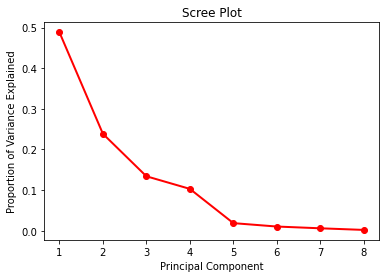

In [183]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

PROFILING THE PRINCIPAL COMPONENTS

In [184]:
component_matrix

,0,1,2,3,4,5,6,7
longitude,0.076554,-0.701173,-0.055862,-0.069062,-0.100463,-0.481196,-0.500392,-0.050703
latitude,-0.073709,0.701885,0.012211,-0.099675,-0.049758,-0.467891,-0.518742,-0.036746
housing_median_age,-0.218303,0.016575,-0.392200,0.887111,-0.035210,-0.091550,-0.040570,0.003973
total_rooms,0.483796,0.075301,0.092746,0.114938,-0.316576,-0.554183,0.554388,-0.154185
total_bedrooms,0.490450,0.061181,-0.116757,0.063249,-0.378217,0.228857,-0.221717,0.702497
population,0.471852,0.026914,-0.116069,0.082861,0.848897,-0.131004,-0.022058,0.134233
households,0.491692,0.063996,-0.109019,0.096630,-0.138478,0.401736,-0.305489,-0.677517
median_income,0.045214,-0.034737,0.891806,0.406098,0.055866,0.055659,-0.168982,0.041729


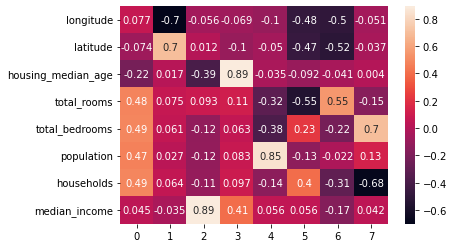

In [185]:
ax = sns.heatmap(component_matrix, annot=True)

In [186]:
pca_components = pd.DataFrame(x_pca)
pca_components

,0,1,2,3,4,5,6,7
0,-2.091848,1.395074,2.051422,1.481689,0.107928,0.145694,-0.228134,0.103872
1,2.936717,1.934054,2.154508,0.949703,-0.423913,0.068977,0.055305,-0.260118
2,-1.968320,1.464482,1.183152,2.095745,0.019042,-0.038863,-0.086104,0.075156
3,-1.917650,1.505893,0.386435,1.762672,-0.009139,0.026586,-0.047388,0.061490
4,-1.775537,1.564319,-0.466925,1.414401,-0.162771,-0.049931,0.146266,0.002063
...,...,...,...,...,...,...,...,...
20428,-1.048033,1.733655,-0.795678,-1.038116,-0.156479,-0.472556,-0.350881,-0.052707
20429,-1.864341,1.637843,0.026344,-1.489437,-0.048597,-0.412450,-0.335039,-0.010416
20430,-0.449721,1.807140,-0.529281,-1.479534,-0.223228,-0.367698,-0.287363,-0.067869
20431,-0.861387,1.795404,-0.423595,-1.442697,-0.259637,-0.344929,-0.268151,-0.042893


In [187]:
comp_0_relations = pd.concat([num_data_scaled_pd[["total_rooms",
                                                  "total_bedrooms",
                                                  "population",
                                                  "households"]],
                              pca_components[[0]]],
                             axis = 1)
comp_0_relations.corr()

,total_rooms,total_bedrooms,population,households,0
total_rooms,1.000000,0.930380,0.857281,0.918992,0.956313
total_bedrooms,0.930380,1.000000,0.877747,0.979728,0.969465
population,0.857281,0.877747,1.000000,0.907186,0.932703
households,0.918992,0.979728,0.907186,1.000000,0.971921
0,0.956313,0.969465,0.932703,0.971921,1.000000


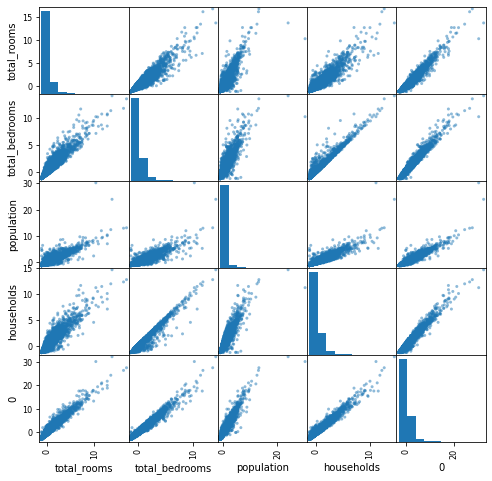

In [188]:
p = pd.plotting.scatter_matrix(comp_0_relations,figsize=(8,8),marker = ".")
plt.show()

In [189]:
comp_1_relations = pd.concat([num_data_scaled_pd[["longitude",
                                                  "latitude"]],
                              pca_components[[1]]],
                             axis = 1)
comp_1_relations.corr()

,longitude,latitude,1
longitude,1.000000,-0.924616,-0.968382
latitude,-0.924616,1.000000,0.969364
1,-0.968382,0.969364,1.000000


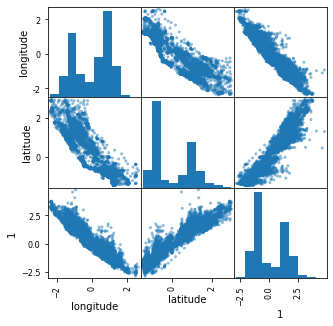

In [190]:
p = pd.plotting.scatter_matrix(comp_1_relations,figsize=(5,5),marker = ".")
plt.show()

In [191]:
comp_2_relations = pd.concat([num_data_scaled_pd[["housing_median_age",
                                                  "median_income"]],
                              pca_components[[2]]],
                             axis = 1)
comp_2_relations.corr()

,housing_median_age,median_income,2
housing_median_age,1.000000,-0.118278,-0.405920
median_income,-0.118278,1.000000,0.923003
2,-0.405920,0.923003,1.000000


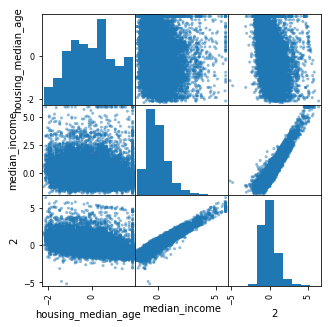

In [192]:
p = pd.plotting.scatter_matrix(comp_2_relations,figsize=(5,5),marker = ".")
plt.show()

In [193]:
comp_3_relations = pd.concat([num_data_scaled_pd[["housing_median_age",
                                                  "median_income"]],
                              pca_components[[3]]],
                             axis = 1)
comp_3_relations.corr()

,housing_median_age,median_income,3
housing_median_age,1.000000,-0.118278,0.804708
median_income,-0.118278,1.000000,0.368377
3,0.804708,0.368377,1.000000


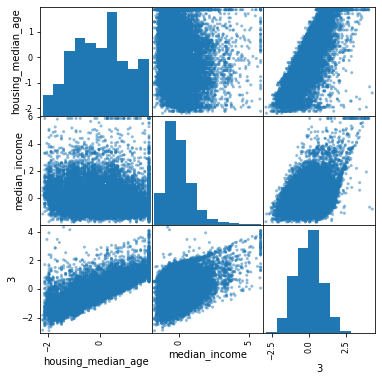

In [194]:
p = pd.plotting.scatter_matrix(comp_3_relations,figsize=(6,6),marker = ".")
plt.show()

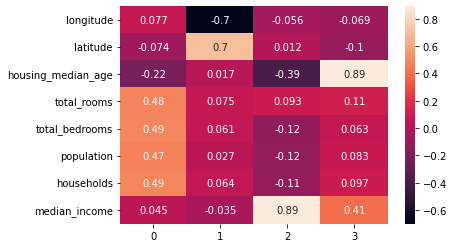

In [202]:
ax = sns.heatmap(component_matrix[[0,1,2,3]], annot=True)

In [204]:
final_components = pca_components[[0,1,2,3]]

CLUSTERING

In [203]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [209]:
kmeans = KMeans(n_clusters=4) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(final_components)

KMeans(n_clusters=4)

In [210]:
identified_clusters = kmeans.fit_predict(final_components)

In [211]:
data_with_clusters = pca_components.copy()
data_with_clusters['Clusters'] = identified_clusters 

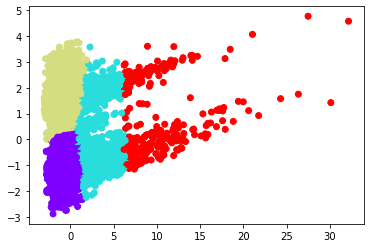

In [212]:
plt.scatter(data_with_clusters[0],data_with_clusters[1],c=data_with_clusters['Clusters'],cmap='rainbow')

In [213]:
kmeans.cluster_centers_

array([[-0.48816351, -1.16515116, -0.04489338,  0.06861153],
       [ 2.63255085, -0.02640389,  0.07364258, -0.18697936],
       [-0.79911266,  1.46487887,  0.04707539, -0.04445575],
       [ 9.94937963,  0.69015298, -0.45587344,  0.72868151]])

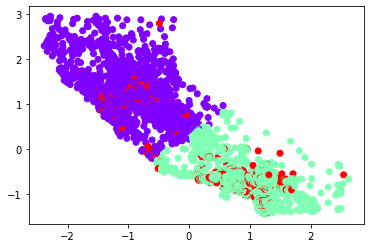

In [79]:

data_with_clusters = num_data_scaled_pd.copy()
data_with_clusters['Clusters'] = identified_clusters 

plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')


In [78]:
data_with_clusters.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'Clusters'],
      dtype='object')

In [80]:
pca_components[0]

0       -2.091848
1        2.936717
2       -1.968320
3       -1.917650
4       -1.775537
           ...   
20428   -1.048033
20429   -1.864341
20430   -0.449721
20431   -0.861387
20432    0.138341
Name: 0, Length: 20433, dtype: float64

In [82]:
temp3 = pd.concat([num_data_scaled_pd[["total_rooms","total_bedrooms","population","households"]],pca_components[[0]]],axis = 1)
temp3.corr()

,total_rooms,total_bedrooms,population,households,0
total_rooms,1.000000,0.930380,0.857281,0.918992,0.956313
total_bedrooms,0.930380,1.000000,0.877747,0.979728,0.969465
population,0.857281,0.877747,1.000000,0.907186,0.932703
households,0.918992,0.979728,0.907186,1.000000,0.971921
0,0.956313,0.969465,0.932703,0.971921,1.000000
